In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_recall_curve
from sklearn.utils.class_weight import compute_class_weight

In [179]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [180]:
df = pd.read_csv('company_bankruptcy_prediction.csv')
df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.780985             1.256969e-04   
1                               0.781506             2.897851e-04   
2                               0.780284             2.361297e-04   
3                               0.781241             1.078888e-04   
4                               0.781550             7.890000e+09   

    Research and development expense rate   Cash flow rate  \
0                                     0.0         0.458143   
1                                     0.0         0.461867   
2                              25500000.0         0.458521   
3                                     0.0         0.465705   
4                                     0.0         0.462746   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000725            0.0   
1                              0.000647            0.0   
2                              0.000790            0.0   
3                              0.000449            0.0   
4                              0.000686            0.0   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.147950                  0.147950   
1                  0.182251                  0.182251   
2                  0.177911                  0.177911   
3                  0.154187                  0.154187   
4                  0.167502                  0.167502   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.147950                                  0.169141   
1                  0.182251                                  0.208944   
2                  0.193713                     

Train-test split


*Requirements for Logistic Regression*

1.  **Binary Target:** The dependent variable must have exactly two possible outcomes.(check)
2.  **No Missing Data:** The dataset cannot have any missing values in its features or target.(check)
3.  **Numerical Features:** All predictor variables must be in a numerical format.(check)
4.  **No Perfect Multicollinearity:** No feature can be a perfect linear combination of other features.(check)
5.  **Independent Observations:** Data points must not be influenced by or related to each other.(check)
6.  **Limited Outliers:** The model should not be trained on data with extreme, influential outliers.(assumed)
7.  **Adequate Sample Size:** You need significantly more data points than features to avoid overfitting.(check)
8.  **Feature Scaling:** Features must be standardized or normalized for reliable and efficient model fitting.(check)
9.  **Address Class Imbalance:** The model requires balancing techniques if one outcome class is much rarer than the other.(check)

**Basic EDA**

In [181]:
#remove all leading and trailing spaces from column names and all lowercase
df.columns = df.columns.str.strip().str.lower()
df.head()

bankrupt?  roa(c) before interest and depreciation before interest  \
0          1                                           0.370594         
1          1                                           0.464291         
2          1                                           0.426071         
3          1                                           0.399844         
4          1                                           0.465022         

   roa(a) before interest and % after tax  \
0                                0.424389   
1                                0.538214   
2                                0.499019   
3                                0.451265   
4                                0.538432   

   roa(b) before interest and depreciation after tax  operating gross margin  \
0                                           0.405750                0.601457   
1                                           0.516730                0.610235   
2                                           0.472295                0.601450   
3                                           0.457733                0.583541   
4                                           0.522298                0.598783   

   realized sales gross margin  operating profit rate  \
0                     0.601457               0.998969   
1                     0.610235               0.998946   
2                     0.601364               0.998857   
3                     0.583541               0.998700   
4                     0.598783               0.998973   

   pre-tax net interest rate  after-tax net interest rate  \
0                   0.796887                     0.808809   
1                   0.797380                     0.809301   
2                   0.796403                     0.808388   
3                   0.796967                     0.808966   
4                   0.797366                     0.809304   

   non-industry income and expenditure/revenue  \
0                                     0.302646   
1                                     0.303556   
2                                     0.302035   
3                                     0.303350   
4                                     0.303475   

   continuous interest rate (after tax)  operating expense rate  \
0                              0.780985            1.256969e-04   
1                              0.781506            2.897851e-04   
2                              0.780284            2.361297e-04   
3                              0.781241            1.078888e-04   
4                              0.781550            7.890000e+09   

   research and development expense rate  cash flow rate  \
0                                    0.0        0.458143   
1                                    0.0        0.461867   
2                             25500000.0        0.458521   
3                                    0.0        0.465705   
4                                    0.0        0.462746   

   interest-bearing debt interest rate  tax rate (a)  net value per share (b)  \
0                             0.000725           0.0                 0.147950   
1                             0.000647           0.0                 0.182251   
2                             0.000790           0.0                 0.177911   
3                             0.000449           0.0                 0.154187   
4                             0.000686           0.0                 0.167502   

   net value per share (a)  net value per share (c)  \
0                 0.147950                 0.147950   
1                 0.182251                 0.182251   
2                 0.177911                 0.193713   
3                 0.154187                 0.154187   
4                 0.167502                 0.167502   

   persistent eps in the last four seasons  cash flow per share  \
0                                 0.169141             0.311664   
1                                 0.208944             0.318137   
2                 

In [182]:
df.shape

(6819, 96)

In [183]:
df['bankrupt?'].value_counts()

bankrupt?
0    6599
1     220
Name: count, dtype: int64

In [184]:
#percentage of bankrupt companies
df['bankrupt?'].value_counts()/len(df) * 100

bankrupt?
0    96.77372
1     3.22628
Name: count, dtype: float64

2.  **No Missing Data:** The dataset cannot have any missing values in its features or target. (check)

In [185]:
df.isnull().sum()

bankrupt?                                                  0
roa(c) before interest and depreciation before interest    0
roa(a) before interest and % after tax                     0
roa(b) before interest and depreciation after tax          0
operating gross margin                                     0
realized sales gross margin                                0
operating profit rate                                      0
pre-tax net interest rate                                  0
after-tax net interest rate                                0
non-industry income and expenditure/revenue                0
continuous interest rate (after tax)                       0
operating expense rate                                     0
research and development expense rate                      0
cash flow rate                                             0
interest-bearing debt interest rate                        0
tax rate (a)                                               0
net value per share (b) 

In [186]:
df.duplicated().sum()

np.int64(0)

In [187]:
df.nunique()

bankrupt?                                                     2
roa(c) before interest and depreciation before interest    3333
roa(a) before interest and % after tax                     3151
roa(b) before interest and depreciation after tax          3160
operating gross margin                                     3781
realized sales gross margin                                3788
operating profit rate                                      3376
pre-tax net interest rate                                  3789
after-tax net interest rate                                3604
non-industry income and expenditure/revenue                2551
continuous interest rate (after tax)                       3617
operating expense rate                                     2966
research and development expense rate                      1536
cash flow rate                                             5557
interest-bearing debt interest rate                        1080
tax rate (a)                            

In [188]:
df['net income flag'].value_counts()

net income flag
1    6819
Name: count, dtype: int64

In [189]:
#remove net income flag column as it is not useful for prediction
df = df.drop(columns=['net income flag'])

4.  **No Perfect Multicollinearity:** No feature can be a perfect linear combination of other features.

In [190]:
#correlation matrix
corr = df.corr()
plt.figure(figsize=(200, 150))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Many features have perfect linearity, lets handle that with VIF(Variance Inflation Factor).  
VIF measures how much the variance of a regression coefficient is inflated due to multicollinearity (correlation) with other features in the model.  
So we need to drop columns some at a time to get VIF under 10 for all columns which is good for logistic regression.

train-test split

In [191]:
# Cell 3: Train-Test Split BEFORE any preprocessing
# Split the data first
X = df.drop('bankrupt?', axis=1)
y = df['bankrupt?']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("\nTraining class distribution:")
print(y_train.value_counts())

Training set shape: (5455, 94)
Test set shape: (1364, 94)

Training class distribution:
bankrupt?
0    5279
1     176
Name: count, dtype: int64


In [192]:
# Remove 'bankrupt?' from your TRAINING features before calculating VIF
features_df = X_train.copy()  # Use training data only

In [193]:
def calculate_vif(df):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    import pandas as pd
    
    print("VIF for all features:")
    
    # Calculate and display VIF for each feature
    for i, column in enumerate(df.columns):
        vif = variance_inflation_factor(df.values, i)
        print(f"{column:<60} : {vif:>10.2f}")
    
    # Show summary of high VIF features
    high_vif_features = []
    for i, column in enumerate(df.columns):
        vif = variance_inflation_factor(df.values, i)
        if vif > 10:
            high_vif_features.append((column, vif))
    
    if high_vif_features:
        print(f"\nFeatures with VIF > 10 ({len(high_vif_features)} features):")
        for feature, vif in sorted(high_vif_features, key=lambda x: x[1], reverse=True):
            print(f"{feature:<60} : {vif:>10.2f}")
    else:
        print("\nNo features with VIF > 10 - Good!")

In [194]:
def drop_high_vif_features(df, vif_threshold):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    
    features_to_drop = []
    
    # Calculate VIF and identify features to drop
    for i, column in enumerate(df.columns):
        vif = variance_inflation_factor(df.values, i)
        if vif > vif_threshold:
            features_to_drop.append(column)
    
    # Drop features
    if features_to_drop:
        df.drop(features_to_drop, axis=1, inplace=True)
    
    return features_to_drop

In [195]:
calculate_vif(features_df)

VIF for all features:
roa(c) before interest and depreciation before interest      :      91.75
roa(a) before interest and % after tax                       :      51.15
roa(b) before interest and depreciation after tax            :     154.92
operating gross margin                                       : 66457009.33
realized sales gross margin                                  :    1169.53
operating profit rate                                        : 96552154.09
pre-tax net interest rate                                    : 65604859.60
after-tax net interest rate                                  :   10793.76
non-industry income and expenditure/revenue                  : 7747313.86
continuous interest rate (after tax)                         :    8241.09
operating expense rate                                       :       1.28
research and development expense rate                        :       1.09
cash flow rate                                               :       7.51
interest-bear

In [196]:
drop_high_vif_features(features_df, vif_threshold=1000000)

['operating gross margin',
 'operating profit rate',
 'pre-tax net interest rate',
 'non-industry income and expenditure/revenue',
 'debt ratio %',
 'net worth/assets',
 'working capital to total assets',
 'current assets/total assets',
 'current liability to assets',
 'current liabilities/liability',
 'current liabilities/equity',
 'current liability to liability',
 'current liability to equity',
 'gross profit to sales']

In [197]:
calculate_vif(features_df)

VIF for all features:
roa(c) before interest and depreciation before interest      :      83.04
roa(a) before interest and % after tax                       :      47.20
roa(b) before interest and depreciation after tax            :     139.18
realized sales gross margin                                  :       2.57
after-tax net interest rate                                  :    4043.89
continuous interest rate (after tax)                         :    4490.19
operating expense rate                                       :       1.27
research and development expense rate                        :       1.08
cash flow rate                                               :       6.29
interest-bearing debt interest rate                          :       1.05
tax rate (a)                                                 :       1.32
net value per share (b)                                      :    2338.90
net value per share (a)                                      :    6012.88
net value per sh

In [198]:
drop_high_vif_features(features_df, 100)

['roa(b) before interest and depreciation after tax',
 'after-tax net interest rate',
 'continuous interest rate (after tax)',
 'net value per share (b)',
 'net value per share (a)',
 'net value per share (c)',
 'operating profit per share (yuan ¥)',
 'after-tax net profit growth rate',
 'regular net profit growth rate',
 'operating profit/paid-in capital',
 'net profit before tax/paid-in capital',
 'working capitcal turnover rate',
 'cash flow to sales',
 'liability to equity']

In [199]:
calculate_vif(features_df)

VIF for all features:
roa(c) before interest and depreciation before interest      :      12.47
roa(a) before interest and % after tax                       :      36.95
realized sales gross margin                                  :       2.48
operating expense rate                                       :       1.26
research and development expense rate                        :       1.07
cash flow rate                                               :       5.89
interest-bearing debt interest rate                          :       1.04
tax rate (a)                                                 :       1.22
persistent eps in the last four seasons                      :      23.06
cash flow per share                                          :       4.47
revenue per share (yuan ¥)                                   :       1.87
per share net profit before tax (yuan ¥)                     :      21.01
realized sales gross profit growth rate                      :       1.07
operating profit

In [200]:
drop_high_vif_features(features_df, 50)

[]

In [201]:
calculate_vif(features_df)

VIF for all features:
roa(c) before interest and depreciation before interest      :      12.47
roa(a) before interest and % after tax                       :      36.95
realized sales gross margin                                  :       2.48
operating expense rate                                       :       1.26
research and development expense rate                        :       1.07
cash flow rate                                               :       5.89
interest-bearing debt interest rate                          :       1.04
tax rate (a)                                                 :       1.22
persistent eps in the last four seasons                      :      23.06
cash flow per share                                          :       4.47
revenue per share (yuan ¥)                                   :       1.87
per share net profit before tax (yuan ¥)                     :      21.01
realized sales gross profit growth rate                      :       1.07
operating profit

Random column showed up with hidden VIF over 3000 with a strange behaviour after removing other features indication suppression effect or conditioal multicollinearity.  
Which means the presence of other features was masking this features multicollinearity.

In [202]:
drop_high_vif_features(features_df, 1000)

[]

In [203]:
calculate_vif(features_df)

VIF for all features:
roa(c) before interest and depreciation before interest      :      12.47
roa(a) before interest and % after tax                       :      36.95
realized sales gross margin                                  :       2.48
operating expense rate                                       :       1.26
research and development expense rate                        :       1.07
cash flow rate                                               :       5.89
interest-bearing debt interest rate                          :       1.04
tax rate (a)                                                 :       1.22
persistent eps in the last four seasons                      :      23.06
cash flow per share                                          :       4.47
revenue per share (yuan ¥)                                   :       1.87
per share net profit before tax (yuan ¥)                     :      21.01
realized sales gross profit growth rate                      :       1.07
operating profit

In [204]:
drop_high_vif_features(features_df, 30)

['roa(a) before interest and % after tax']

In [205]:
calculate_vif(features_df)

VIF for all features:
roa(c) before interest and depreciation before interest      :       8.71
realized sales gross margin                                  :       2.47
operating expense rate                                       :       1.25
research and development expense rate                        :       1.07
cash flow rate                                               :       5.89
interest-bearing debt interest rate                          :       1.04
tax rate (a)                                                 :       1.21
persistent eps in the last four seasons                      :      23.06
cash flow per share                                          :       4.39
revenue per share (yuan ¥)                                   :       1.87
per share net profit before tax (yuan ¥)                     :      20.70
realized sales gross profit growth rate                      :       1.07
operating profit growth rate                                 :      12.85
continuous net p

In [206]:
drop_high_vif_features(features_df, 15)

['persistent eps in the last four seasons',
 'per share net profit before tax (yuan ¥)',
 'interest expense ratio',
 'working capital/equity']

In [207]:
calculate_vif(features_df)

VIF for all features:
roa(c) before interest and depreciation before interest      :     486.37
realized sales gross margin                                  :       2.45
operating expense rate                                       :       1.25
research and development expense rate                        :       1.06
cash flow rate                                               :       5.83
interest-bearing debt interest rate                          :       1.06
tax rate (a)                                                 :       1.93
cash flow per share                                          :       3.06
revenue per share (yuan ¥)                                   :       1.85
realized sales gross profit growth rate                      :      99.41
operating profit growth rate                                 :      12.67
continuous net profit growth rate                            :     383.34
total asset growth rate                                      :       5.11
net value growth

In [208]:
drop_high_vif_features(features_df, vif_threshold=10)

['roa(c) before interest and depreciation before interest',
 'realized sales gross profit growth rate',
 'operating profit growth rate',
 'continuous net profit growth rate',
 'total asset return growth rate ratio',
 'cash reinvestment %',
 'borrowing dependency',
 'inventory and accounts receivable/net value',
 'operating profit per person',
 'quick assets/total assets',
 'operating funds to liability',
 'inventory/working capital',
 'retained earnings to total assets',
 'cash flow to liability',
 'net income to total assets',
 'interest coverage ratio (interest expense to ebit)']

In [209]:
calculate_vif(features_df)

VIF for all features:
realized sales gross margin                                  :       1.66
operating expense rate                                       :       1.21
research and development expense rate                        :       1.05
cash flow rate                                               :       2.30
interest-bearing debt interest rate                          :       1.03
tax rate (a)                                                 :       1.10
cash flow per share                                          :       2.47
revenue per share (yuan ¥)                                   :       1.73
total asset growth rate                                      :       1.06
net value growth rate                                        :       2.11
current ratio                                                :       3.06
quick ratio                                                  :       1.03
total debt/total net worth                                   :       1.21
long-term fund s

In [210]:
# Get current features after all VIF removal from TRAINING data
final_features = features_df.columns.tolist()

# Get original features (before any dropping) from TRAINING data
original_features = X_train.columns.tolist()

# Find what was dropped
dropped_features = list(set(original_features) - set(final_features))

print(f"Dropped {len(dropped_features)} features:")
for feature in dropped_features:
    print(f"  - {feature}")

# Apply the same feature drops to BOTH train and test sets
X_train_clean = X_train.drop(dropped_features, axis=1)
X_test_clean = X_test.drop(dropped_features, axis=1)

print(f"X_train_clean shape: {X_train_clean.shape}")
print(f"X_test_clean shape: {X_test_clean.shape}")

Dropped 49 features:
  - non-industry income and expenditure/revenue
  - gross profit to sales
  - current liability to assets
  - working capital to total assets
  - current liability to equity
  - net income to total assets
  - roa(c) before interest and depreciation before interest
  - operating profit growth rate
  - debt ratio %
  - after-tax net interest rate
  - persistent eps in the last four seasons
  - regular net profit growth rate
  - realized sales gross profit growth rate
  - operating funds to liability
  - working capital/equity
  - borrowing dependency
  - net value per share (a)
  - current liabilities/liability
  - inventory/working capital
  - cash flow to sales
  - pre-tax net interest rate
  - current liabilities/equity
  - operating gross margin
  - current liability to liability
  - retained earnings to total assets
  - inventory and accounts receivable/net value
  - continuous interest rate (after tax)
  - working capitcal turnover rate
  - net worth/assets
  -

In [211]:
# Check the shapes of your cleaned training and test sets
print(f"X_train_clean shape: {X_train_clean.shape}")
print(f"X_test_clean shape: {X_test_clean.shape}")

X_train_clean shape: (5455, 45)
X_test_clean shape: (1364, 45)


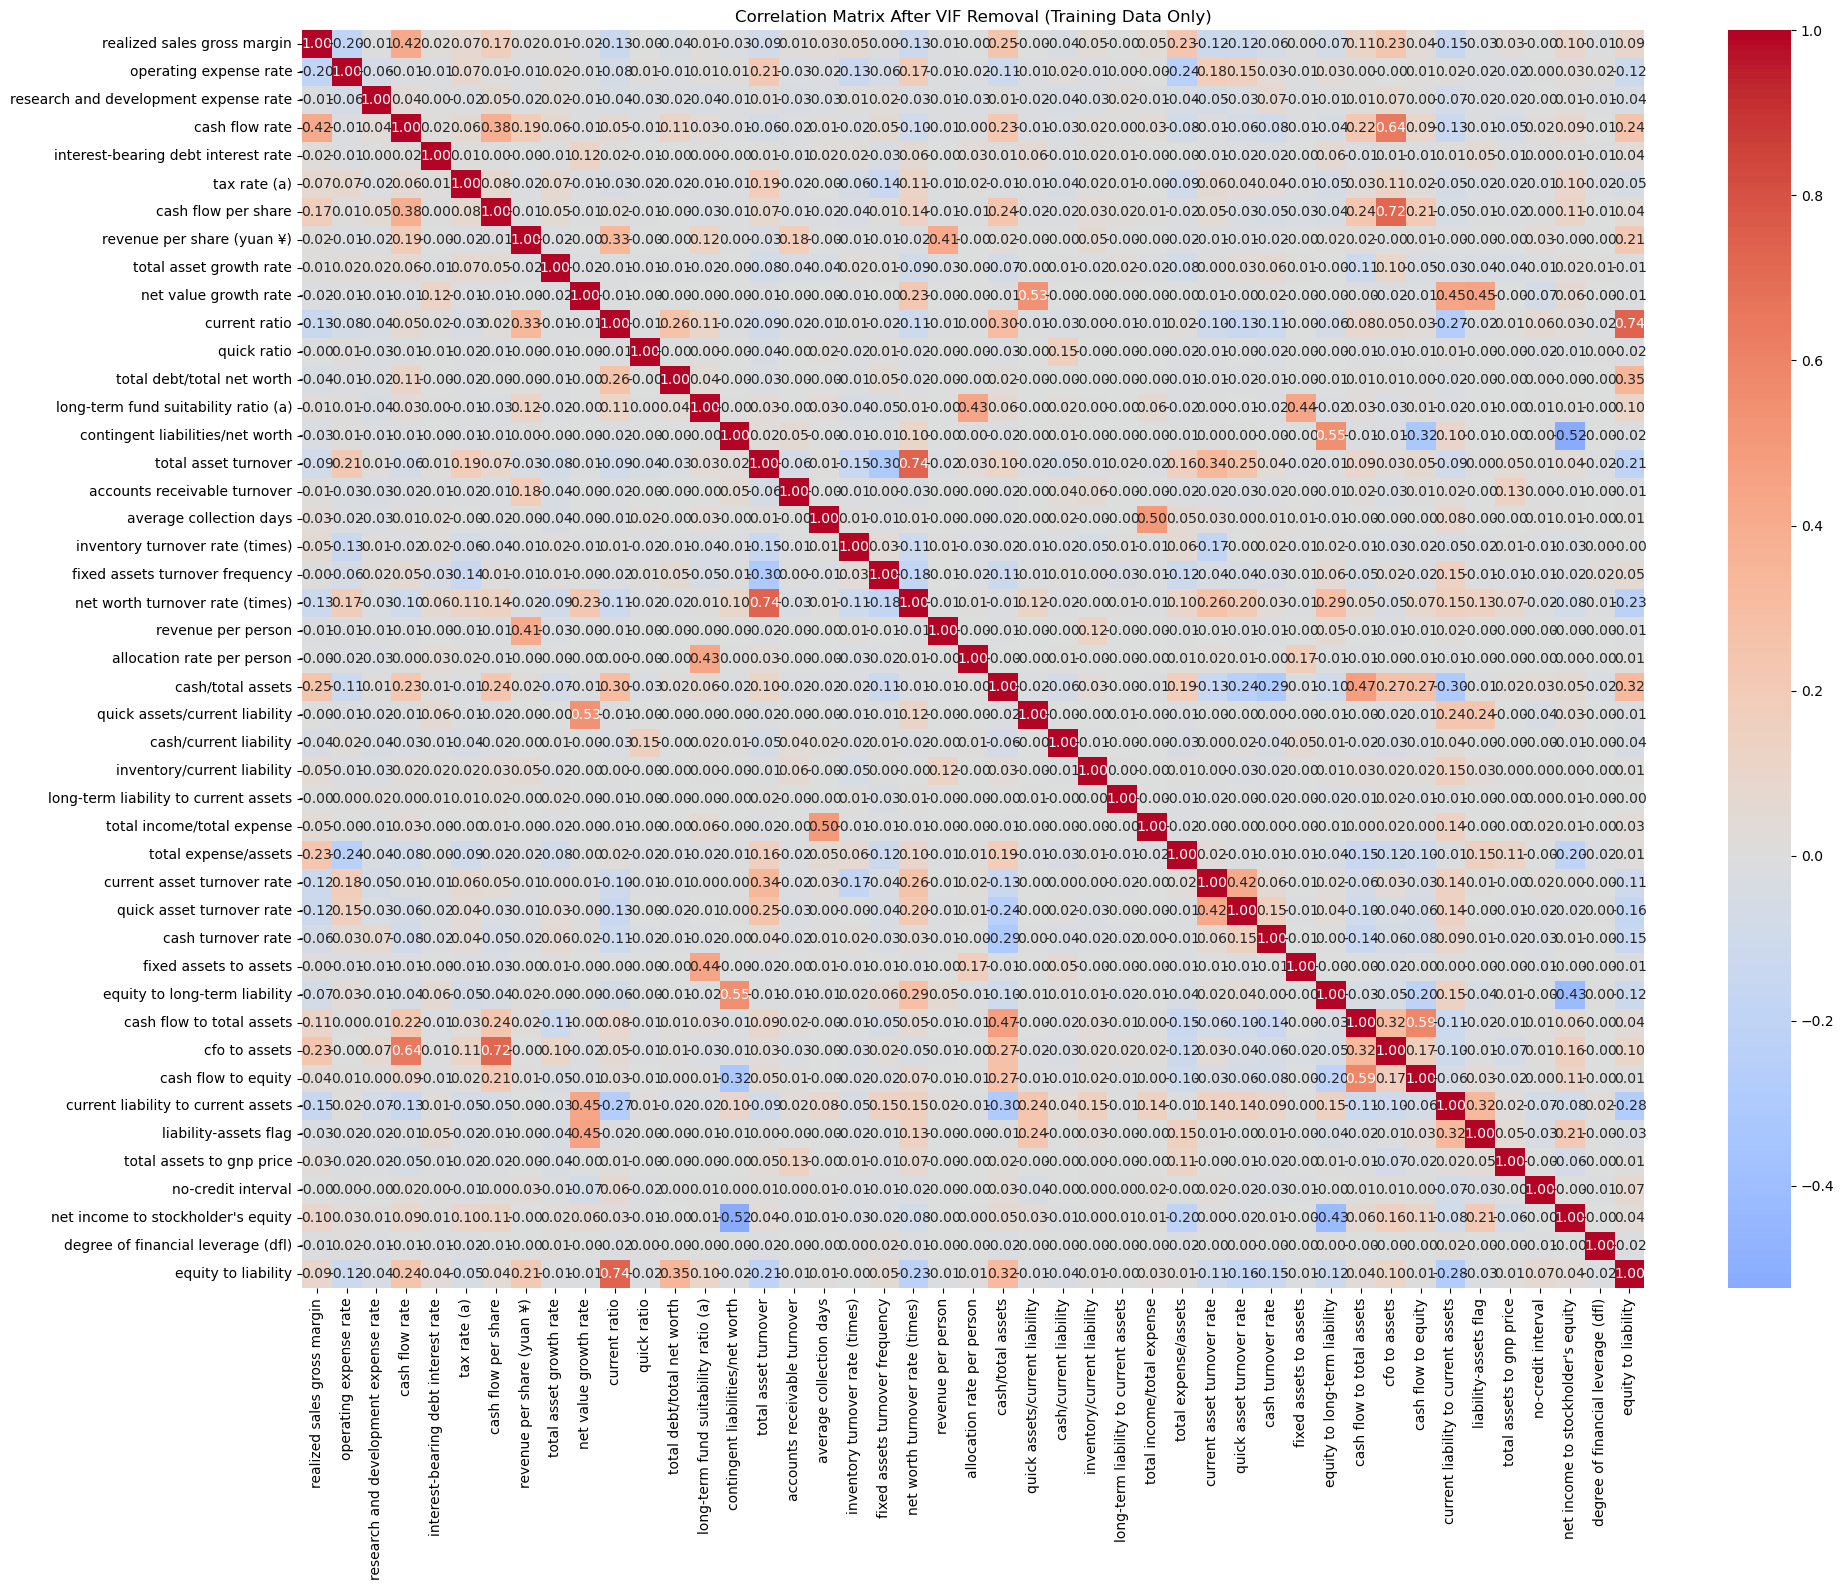

In [212]:
# Calculate correlation matrix for the cleaned TRAINING features only
corr_clean = X_train_clean.corr()

# Create a more manageable heatmap (smaller size since you have fewer features)
plt.figure(figsize=(20, 16))  # Reduced size for better visibility
sns.heatmap(corr_clean, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix After VIF Removal (Training Data Only)')
plt.tight_layout()
plt.show()

In [213]:
# Find high correlations between features (excluding target) in TRAINING data only
corr_matrix = X_train_clean.corr()
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:  # Adjust threshold as needed
            high_corr_pairs.append((
                corr_matrix.columns[i], 
                corr_matrix.columns[j],
                corr_matrix.iloc[i, j]
            ))

print("Severely correlated feature pairs (Training Data):")
for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")

Severely correlated feature pairs (Training Data):
net worth turnover rate (times) - total asset turnover: 0.738
cfo to assets - cash flow per share: 0.717
equity to liability - current ratio: 0.738


In [214]:
# Drop the problematic and redundant features from BOTH train and test sets
features_to_drop = [
    'net worth turnover rate (times)',  # 0.738 with total asset turnover
    'cfo to assets',                    # 0.717 with cash flow per share  
    'equity to liability'               # 0.738 with current ratio
]

X_train_clean = X_train_clean.drop(features_to_drop, axis=1)
X_test_clean = X_test_clean.drop(features_to_drop, axis=1)

print(f"After removing correlated features:")
print(f"X_train_clean shape: {X_train_clean.shape}")
print(f"X_test_clean shape: {X_test_clean.shape}")

After removing correlated features:
X_train_clean shape: (5455, 42)
X_test_clean shape: (1364, 42)


6.  **Limited Outliers:** The model should not be trained on data with extreme, influential outliers.(check)

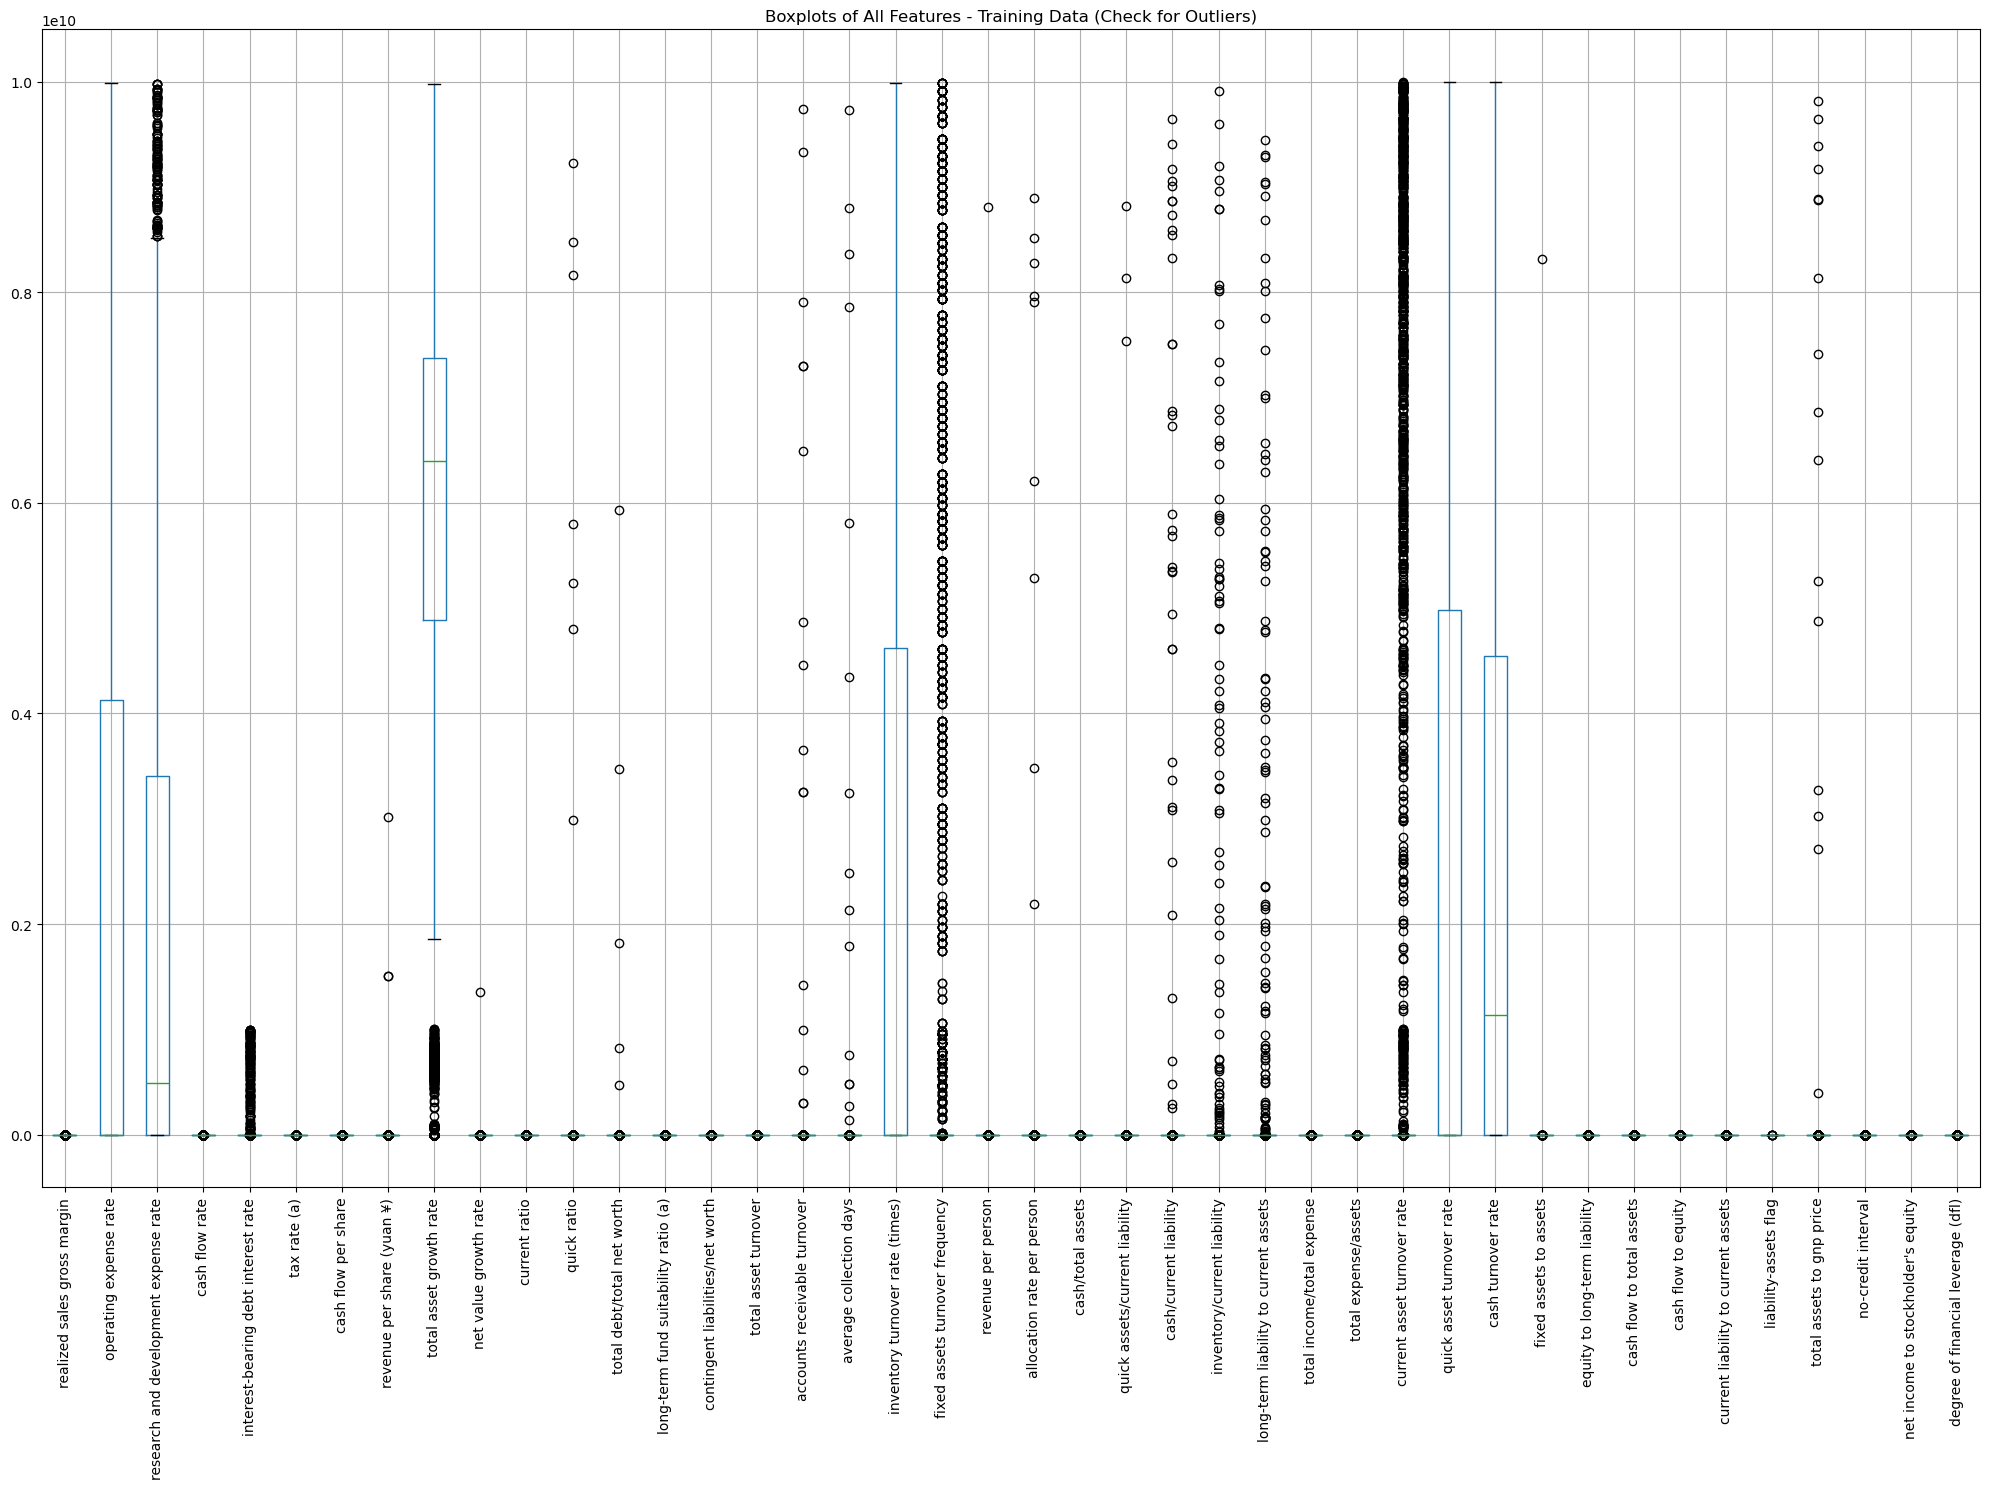

In [215]:
# Create boxplots for all features to visually identify outliers (TRAINING DATA ONLY)
plt.figure(figsize=(20, 15))

# Use the cleaned training data
X_train_clean.boxplot()
plt.xticks(rotation=90)
plt.title('Boxplots of All Features - Training Data (Check for Outliers)')
plt.tight_layout()
plt.show()

In [216]:
# Calculate skewness for all features in CLEANED TRAINING DATA only
skewness = X_train_clean.apply(lambda x: x.skew()).sort_values(ascending=False)

print("Feature Skewness Analysis (Training Data - After Feature Selection):")
for feature, skew_val in skewness.items():
    if abs(skew_val) > 1:
        print(f"{feature:<50} : {skew_val:>7.2f}")

Feature Skewness Analysis (Training Data - After Feature Selection):
fixed assets to assets                             :   73.86
net value growth rate                              :   73.86
revenue per person                                 :   73.86
total income/total expense                         :   73.70
contingent liabilities/net worth                   :   71.85
total debt/total net worth                         :   51.47
revenue per share (yuan ¥)                         :   50.24
quick assets/current liability                     :   42.88
degree of financial leverage (dfl)                 :   41.80
equity to long-term liability                      :   35.01
liability-assets flag                              :   32.99
quick ratio                                        :   31.61
average collection days                            :   29.80
allocation rate per person                         :   27.57
long-term fund suitability ratio (a)               :   27.19
accounts receiva

In [217]:
# Identify non-binary columns (columns with more than 2 unique values) in CLEANED TRAINING DATA
non_binary_columns = []
for column in X_train_clean.columns:
    if X_train_clean[column].nunique() > 2:
        non_binary_columns.append(column)

print(f"Non-binary columns to transform ({len(non_binary_columns)}):")
for col in non_binary_columns:
    print(f"  - {col}")

print(f"\nBinary columns to skip ({len(X_train_clean.columns) - len(non_binary_columns)}):")
binary_columns = [col for col in X_train_clean.columns if col not in non_binary_columns]
for col in binary_columns:
    print(f"  - {col}")

Non-binary columns to transform (41):
  - realized sales gross margin
  - operating expense rate
  - research and development expense rate
  - cash flow rate
  - interest-bearing debt interest rate
  - tax rate (a)
  - cash flow per share
  - revenue per share (yuan ¥)
  - total asset growth rate
  - net value growth rate
  - current ratio
  - quick ratio
  - total debt/total net worth
  - long-term fund suitability ratio (a)
  - contingent liabilities/net worth
  - total asset turnover
  - accounts receivable turnover
  - average collection days
  - inventory turnover rate (times)
  - fixed assets turnover frequency
  - revenue per person
  - allocation rate per person
  - cash/total assets
  - quick assets/current liability
  - cash/current liability
  - inventory/current liability
  - long-term liability to current assets
  - total income/total expense
  - total expense/assets
  - current asset turnover rate
  - quick asset turnover rate
  - cash turnover rate
  - fixed assets to as

In [218]:
# Store the winsorization limits to apply to test data later
winsorize_limits = {}

for feature in non_binary_columns:
    skew_val = skewness[feature]
    
    if abs(skew_val) > 10:
        limits = [0.10, 0.10]
        X_train_clean[feature] = winsorize(X_train_clean[feature], limits=limits)
        winsorize_limits[feature] = limits
        print(f"Extreme skew {skew_val:>6.2f}: Winsorized 10% - {feature}")
            
    elif abs(skew_val) > 5:
        limits = [0.07, 0.07]
        X_train_clean[feature] = winsorize(X_train_clean[feature], limits=limits)
        winsorize_limits[feature] = limits
        print(f"High skew {skew_val:>6.2f}: Winsorized 7% - {feature}")
        
    elif abs(skew_val) > 2:
        limits = [0.05, 0.05]
        X_train_clean[feature] = winsorize(X_train_clean[feature], limits=limits)
        winsorize_limits[feature] = limits
        print(f"Moderate skew {skew_val:>6.2f}: Winsorized 5% - {feature}")
        
    elif abs(skew_val) > 1:
        limits = [0.03, 0.03]
        X_train_clean[feature] = winsorize(X_train_clean[feature], limits=limits)
        winsorize_limits[feature] = limits
        print(f"Mild skew {skew_val:>6.2f}: Winsorized 3% - {feature}")

Extreme skew -12.21: Winsorized 10% - realized sales gross margin
Mild skew   1.26: Winsorized 3% - operating expense rate
Mild skew   1.28: Winsorized 3% - research and development expense rate
Moderate skew  -2.63: Winsorized 5% - cash flow rate
High skew   7.04: Winsorized 7% - interest-bearing debt interest rate
Mild skew   1.92: Winsorized 3% - tax rate (a)
Extreme skew  12.34: Winsorized 10% - cash flow per share
Extreme skew  50.24: Winsorized 10% - revenue per share (yuan ¥)
Extreme skew  73.86: Winsorized 10% - net value growth rate
Extreme skew  23.11: Winsorized 10% - current ratio
Extreme skew  31.61: Winsorized 10% - quick ratio
Extreme skew  51.47: Winsorized 10% - total debt/total net worth
Extreme skew  27.19: Winsorized 10% - long-term fund suitability ratio (a)
Extreme skew  71.85: Winsorized 10% - contingent liabilities/net worth
Moderate skew   2.26: Winsorized 5% - total asset turnover
Extreme skew  25.71: Winsorized 10% - accounts receivable turnover
Extreme skew 

In [219]:
# Apply the same winsorization to CLEANED test data
for feature, limits in winsorize_limits.items():
    if feature in X_test_clean.columns:
        X_test_clean[feature] = winsorize(X_test_clean[feature], limits=limits)

print("Winsorization applied to test data")

Winsorization applied to test data


In [220]:
# Handle negative skew only for non-binary columns in CLEANED TRAINING DATA
negative_skew_transforms = {}

for feature in non_binary_columns:
    skew_val = skewness[feature]
    
    if skew_val < -5:
        # Calculate transformation parameters from CLEANED TRAINING data only
        max_val = X_train_clean[feature].max()
        reflected = max_val - X_train_clean[feature] + 1
        logged = np.log(reflected)
        X_train_clean[feature] = -logged
        
        # Store transformation parameters for test data
        negative_skew_transforms[feature] = max_val
        print(f"Extreme negative skew {skew_val:>6.2f}: Reflect+log - {feature}")

Extreme negative skew -12.21: Reflect+log - realized sales gross margin
Extreme negative skew -17.86: Reflect+log - no-credit interval
Extreme negative skew -27.99: Reflect+log - net income to stockholder's equity


In [221]:
# Later, apply the same transformation to CLEANED test data
for feature, max_val in negative_skew_transforms.items():
    reflected = max_val - X_test_clean[feature] + 1
    logged = np.log(reflected)
    X_test_clean[feature] = -logged

In [222]:
# Calculate skewness for all features in CLEANED TRAINING DATA after transformations
skewness_after = X_train_clean.apply(lambda x: x.skew()).sort_values(ascending=False)

print("Feature Skewness Analysis After Transformations (Training Data - Cleaned Features):")
for feature, skew_val in skewness_after.items():
    print(f"{feature:<50} : {skew_val:>7.2f}")

Feature Skewness Analysis After Transformations (Training Data - Cleaned Features):
liability-assets flag                              :   32.99
fixed assets turnover frequency                    :    2.22
current asset turnover rate                        :    2.07
long-term fund suitability ratio (a)               :    1.43
contingent liabilities/net worth                   :    1.41
cash/total assets                                  :    1.37
total assets to gnp price                          :    1.34
degree of financial leverage (dfl)                 :    1.27
operating expense rate                             :    1.25
cash/current liability                             :    1.24
research and development expense rate              :    1.20
revenue per person                                 :    1.17
long-term liability to current assets              :    1.15
inventory turnover rate (times)                    :    1.12
quick asset turnover rate                          :    1.12
a

8.  **Feature Scaling:** Features must be standardized or normalized for reliable and efficient model fitting. (check)

In [223]:
# Scale all features in CLEANED training and test data
scaler = StandardScaler()

# Fit on cleaned training data only, then transform both
X_train_scaled = scaler.fit_transform(X_train_clean)
X_test_scaled = scaler.transform(X_test_clean)

# Convert back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_clean.columns, index=X_train_clean.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_clean.columns, index=X_test_clean.index)

print("Scaling completed - Training data shape:", X_train_scaled.shape)
print("Test data shape:", X_test_scaled.shape)

Scaling completed - Training data shape: (5455, 42)
Test data shape: (1364, 42)


In [224]:
# Check that scaling worked (mean ~0, std ~1 for scaled features in TRAINING data)
print("After scaling - Training Data Feature statistics:")
for feature in X_train_scaled.columns:
    mean_val = X_train_scaled[feature].mean()
    std_val = X_train_scaled[feature].std()
    print(f"{feature:<40} : mean={mean_val:7.3f}, std={std_val:7.3f}")

# Optional: Also check test data statistics (should be close but not exactly 0 and 1)
print("\nTest Data Feature statistics (should be similar):")
for feature in X_test_scaled.columns:
    mean_val = X_test_scaled[feature].mean()
    std_val = X_test_scaled[feature].std()
    print(f"{feature:<40} : mean={mean_val:7.3f}, std={std_val:7.3f}")

After scaling - Training Data Feature statistics:
realized sales gross margin              : mean= -0.000, std=  1.000
operating expense rate                   : mean= -0.000, std=  1.000
research and development expense rate    : mean= -0.000, std=  1.000
cash flow rate                           : mean=  0.000, std=  1.000
interest-bearing debt interest rate      : mean=  0.000, std=  1.000
tax rate (a)                             : mean=  0.000, std=  1.000
cash flow per share                      : mean=  0.000, std=  1.000
revenue per share (yuan ¥)               : mean=  0.000, std=  1.000
total asset growth rate                  : mean=  0.000, std=  1.000
net value growth rate                    : mean=  0.000, std=  1.000
current ratio                            : mean=  0.000, std=  1.000
quick ratio                              : mean= -0.000, std=  1.000
total debt/total net worth               : mean=  0.000, std=  1.000
long-term fund suitability ratio (a)     : mean=  0.0

9.  **Address Class Imbalance:** The model requires balancing techniques if one outcome class is much rarer than the other.(check)

Class Distribution (Training Data):
Non-Bankrupt (0): 5,279 samples (96.77%)
Bankrupt (1):     176 samples (3.23%)


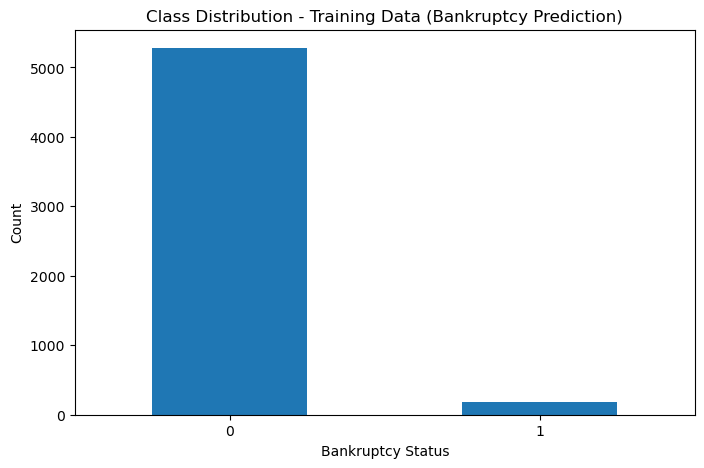

In [225]:
# Check the class distribution in TRAINING DATA
class_distribution = y_train.value_counts()
class_percentage = y_train.value_counts(normalize=True) * 100

print("Class Distribution (Training Data):")
print(f"Non-Bankrupt (0): {class_distribution[0]:,} samples ({class_percentage[0]:.2f}%)")
print(f"Bankrupt (1):     {class_distribution[1]:,} samples ({class_percentage[1]:.2f}%)")

# Visualize
plt.figure(figsize=(8, 5))
y_train.value_counts().plot(kind='bar')
plt.title('Class Distribution - Training Data (Bankruptcy Prediction)')
plt.xlabel('Bankruptcy Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [226]:
# Apply SMOTE to the ALREADY SCALED training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:")
print(y_train.value_counts())
print("\nAfter SMOTE:")
print(y_train_balanced.value_counts())

Before SMOTE:
bankrupt?
0    5279
1     176
Name: count, dtype: int64

After SMOTE:
bankrupt?
0    5279
1    5279
Name: count, dtype: int64


**Feature selection**

In [227]:
def forward_selection_bic(X, y, significance_level=0.05):
    """Forward feature selection using BIC"""
    included = []
    current_bic = np.inf
    
    while True:
        changed = False
        excluded = list(set(X.columns) - set(included))
        best_bic = current_bic
        best_feature = None
        
        for new_column in excluded:
            # Try adding each new feature
            try_features = included + [new_column]
            X_temp = sm.add_constant(X[try_features])
            
            try:
                # Fit logistic regression
                model = sm.Logit(y, X_temp)
                result = model.fit(disp=0, maxiter=1000)
                
                # Get BIC (lower is better)
                bic = result.bic
                
                # If improved BIC, keep this feature
                if bic < best_bic:
                    best_bic = bic
                    best_feature = new_column
                    changed = True
                    
            except:
                continue
        
        if changed:
            included.append(best_feature)
            print(f"Added {best_feature:.<40} BIC = {best_bic:8.2f} | Features: {len(included)}")
            current_bic = best_bic
        else:
            break
    
    return included

# Apply BIC feature selection to ORIGINAL training data (not SMOTE)
print("=== Forward Selection with BIC (Original Data) ===")
selected_features = forward_selection_bic(X_train_scaled, y_train)

# Then use these features for BOTH approaches
X_train_smote_reduced = X_train_balanced[selected_features]
X_test_smote_reduced = X_test_scaled[selected_features]
X_train_weights_reduced = X_train_scaled[selected_features]
X_test_weights_reduced = X_test_scaled[selected_features]

print(f"\nDataset shapes after feature selection:")
print(f"SMOTE training:  {X_train_smote_reduced.shape}")
print(f"SMOTE test:      {X_test_smote_reduced.shape}")
print(f"Weights training: {X_train_weights_reduced.shape}")
print(f"Weights test:     {X_test_weights_reduced.shape}")

=== Forward Selection with BIC (Original Data) ===
Added total debt/total net worth.............. BIC =  1230.47 | Features: 1
Added total income/total expense.............. BIC =  1038.58 | Features: 2
Added interest-bearing debt interest rate..... BIC =  1015.25 | Features: 3
Added revenue per share (yuan ¥).............. BIC =   995.97 | Features: 4
Added total expense/assets.................... BIC =   993.78 | Features: 5
Added allocation rate per person.............. BIC =   986.49 | Features: 6
Added cash flow per share..................... BIC =   985.16 | Features: 7

Dataset shapes after feature selection:
SMOTE training:  (10558, 7)
SMOTE test:      (1364, 7)
Weights training: (5455, 7)
Weights test:     (1364, 7)


**Model**

One with SMOTE data

In [228]:
# Use the feature-selected datasets from BIC selection
model_smote = LogisticRegression(random_state=42, max_iter=1000)
model_smote.fit(X_train_smote_reduced, y_train_balanced)

# Make predictions once
y_pred_train_smote = model_smote.predict(X_train_smote_reduced)
y_proba_train_smote = model_smote.predict_proba(X_train_smote_reduced)[:, 1]
y_pred_test_smote = model_smote.predict(X_test_smote_reduced)
y_proba_test_smote = model_smote.predict_proba(X_test_smote_reduced)[:, 1]

print(f"=== SMOTE MODEL ({len(selected_features)} Features) ===")
print("\nTRAINING PERFORMANCE:")
print(f"Accuracy: {model_smote.score(X_train_smote_reduced, y_train_balanced):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_train_balanced, y_proba_train_smote):.4f}")
print(classification_report(y_train_balanced, y_pred_train_smote))

print("\nTEST PERFORMANCE:")
print(f"Accuracy: {model_smote.score(X_test_smote_reduced, y_test):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_test_smote):.4f}")
print(classification_report(y_test, y_pred_test_smote))

=== SMOTE MODEL (7 Features) ===

TRAINING PERFORMANCE:
Accuracy: 0.8868
ROC-AUC: 0.9509
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      5279
           1       0.87      0.91      0.89      5279

    accuracy                           0.89     10558
   macro avg       0.89      0.89      0.89     10558
weighted avg       0.89      0.89      0.89     10558


TEST PERFORMANCE:
Accuracy: 0.8702
ROC-AUC: 0.9277
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1320
           1       0.17      0.80      0.28        44

    accuracy                           0.87      1364
   macro avg       0.58      0.83      0.61      1364
weighted avg       0.97      0.87      0.91      1364



One with not balanced but using class weights

In [229]:
#calculate class weights for imbalanced data
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

In [230]:
model_weights = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
model_weights.fit(X_train_weights_reduced, y_train)

# Make predictions once
y_pred_train_weights = model_weights.predict(X_train_weights_reduced)
y_proba_train_weights = model_weights.predict_proba(X_train_weights_reduced)[:, 1]
y_pred_test_weights = model_weights.predict(X_test_weights_reduced)
y_proba_test_weights = model_weights.predict_proba(X_test_weights_reduced)[:, 1]

print(f"=== WEIGHTS MODEL ({len(selected_features)} Features) ===")
print("\nTRAINING PERFORMANCE:")
print(f"Accuracy: {model_weights.score(X_train_weights_reduced, y_train):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_train, y_proba_train_weights):.4f}")
print(classification_report(y_train, y_pred_train_weights))

print("\nTEST PERFORMANCE:")
print(f"Accuracy: {model_weights.score(X_test_weights_reduced, y_test):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_test_weights):.4f}")
print(classification_report(y_test, y_pred_test_weights))

=== WEIGHTS MODEL (7 Features) ===

TRAINING PERFORMANCE:
Accuracy: 0.8548
ROC-AUC: 0.9404
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      5279
           1       0.17      0.88      0.28       176

    accuracy                           0.85      5455
   macro avg       0.58      0.87      0.60      5455
weighted avg       0.97      0.85      0.90      5455


TEST PERFORMANCE:
Accuracy: 0.8600
ROC-AUC: 0.9280
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1320
           1       0.17      0.84      0.28        44

    accuracy                           0.86      1364
   macro avg       0.58      0.85      0.60      1364
weighted avg       0.97      0.86      0.90      1364



In [231]:
# Threshold tuning for both models
precisions_smote, recalls_smote, thresholds_smote = precision_recall_curve(y_test, y_proba_test_smote)
precisions_weights, recalls_weights, thresholds_weights = precision_recall_curve(y_test, y_proba_test_weights)

# Find thresholds for ~45% precision
target_precision = 0.45
smote_threshold = thresholds_smote[np.where(precisions_smote >= target_precision)[0][0]]
weights_threshold = thresholds_weights[np.where(precisions_weights >= target_precision)[0][0]]

print(f"Optimal thresholds for {target_precision:.0%} precision:")
print(f"SMOTE: {smote_threshold:.3f}, Weights: {weights_threshold:.3f}")

# Apply tuned thresholds
y_pred_smote = (y_proba_test_smote > smote_threshold).astype(int)
y_pred_weights = (y_proba_test_weights > weights_threshold).astype(int)

print("\nTuned SMOTE:")
print(classification_report(y_test, y_pred_smote))
print("\nTuned Weights:")
print(classification_report(y_test, y_pred_weights))

Optimal thresholds for 45% precision:
SMOTE: 0.976, Weights: 0.960

Tuned SMOTE:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1320
           1       0.47      0.20      0.29        44

    accuracy                           0.97      1364
   macro avg       0.72      0.60      0.63      1364
weighted avg       0.96      0.97      0.96      1364


Tuned Weights:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1320
           1       0.43      0.30      0.35        44

    accuracy                           0.96      1364
   macro avg       0.71      0.64      0.67      1364
weighted avg       0.96      0.96      0.96      1364



In [232]:
# Get coefficients from your trained SMOTE model
coefficient_analysis = pd.DataFrame({
    'feature': selected_features,
    'coefficient': model_smote.coef_[0],
    'abs_coefficient': abs(model_smote.coef_[0])
})

# Sort by absolute coefficient (most impactful features)
coefficient_analysis = coefficient_analysis.sort_values('abs_coefficient', ascending=False)

print("Top Features by Model Impact:")
print(coefficient_analysis.head(10))

Top Features by Model Impact:
                               feature  coefficient  abs_coefficient
0           total debt/total net worth     1.632085         1.632085
1           total income/total expense    -1.258418         1.258418
3           revenue per share (yuan ¥)    -0.657662         0.657662
2  interest-bearing debt interest rate     0.592643         0.592643
4                 total expense/assets     0.547153         0.547153
5           allocation rate per person     0.446242         0.446242
6                  cash flow per share    -0.441981         0.441981


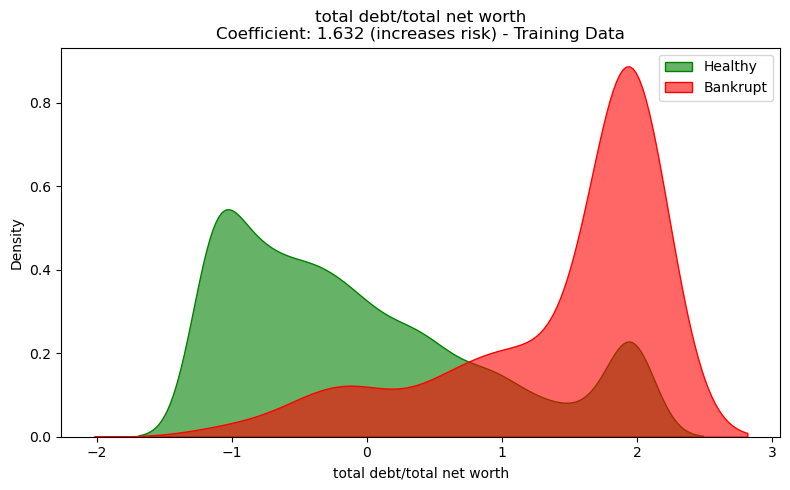

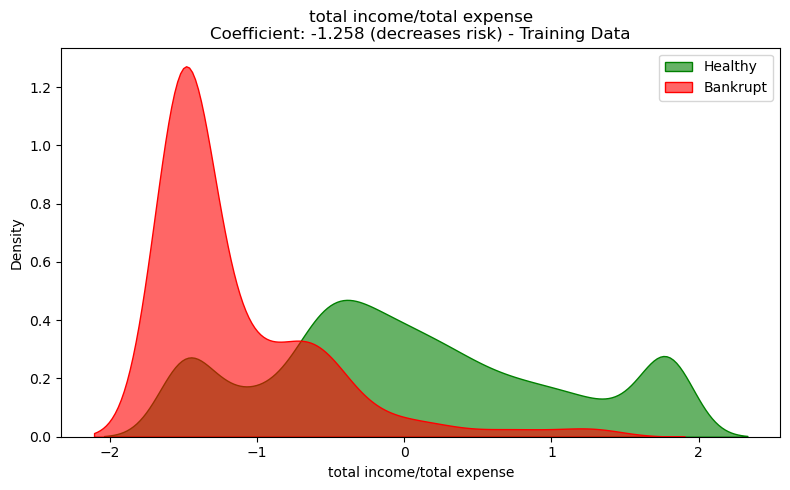

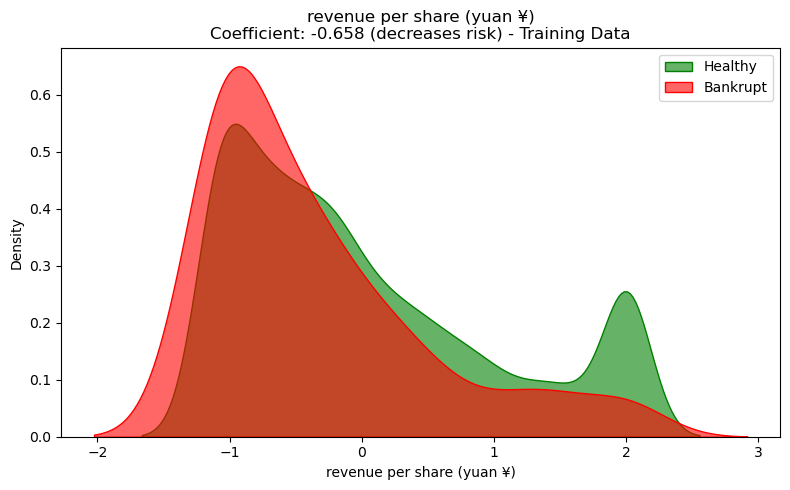

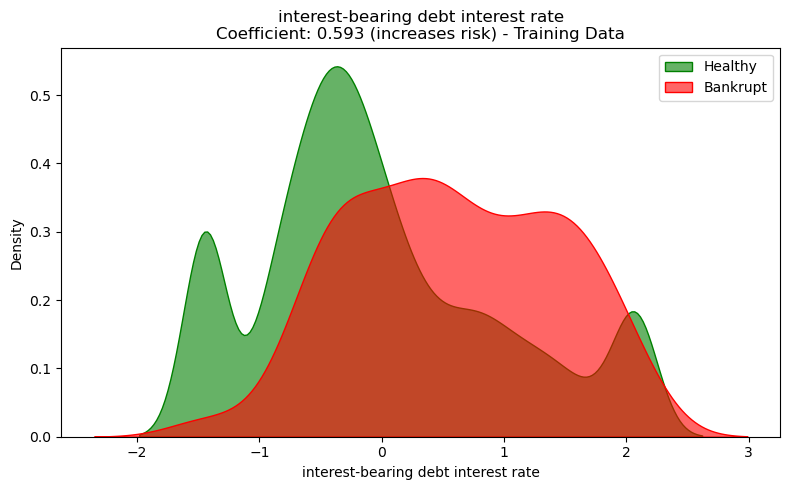

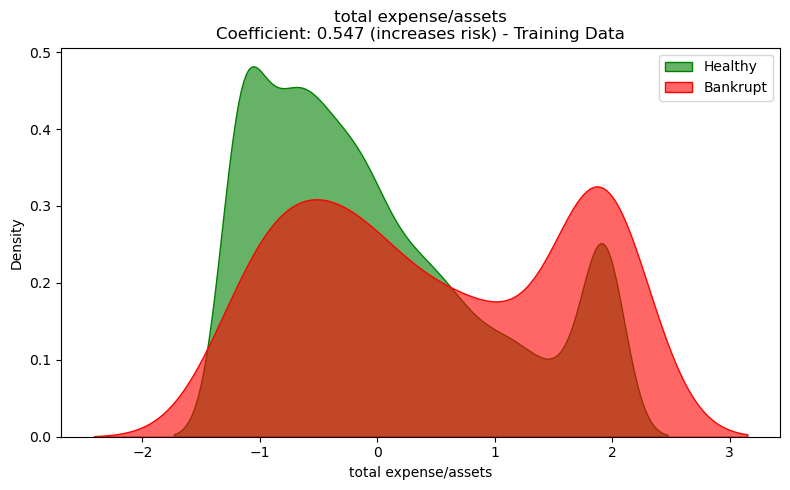

In [233]:
# Just KDE plots for top 5 features (TRAINING DATA ONLY)
top_5_features = coefficient_analysis.head(5)['feature'].tolist()

for feature in top_5_features:
    coef = coefficient_analysis[coefficient_analysis['feature'] == feature]['coefficient'].values[0]
    direction = "increases risk" if coef > 0 else "decreases risk"
    
    plt.figure(figsize=(8, 5))
    
    # Use the training data that was actually used for modeling
    healthy_mask = (y_train == 0)
    bankrupt_mask = (y_train == 1)
    
    # Plot using the scaled training data from class weights approach
    sns.kdeplot(data=X_train_weights_reduced[healthy_mask][feature], 
                label='Healthy', fill=True, alpha=0.6, color='green')
    sns.kdeplot(data=X_train_weights_reduced[bankrupt_mask][feature], 
                label='Bankrupt', fill=True, alpha=0.6, color='red')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.title(f'{feature}\nCoefficient: {coef:.3f} ({direction}) - Training Data')
    plt.tight_layout()
    plt.show()

In [234]:
# Compare both models side-by-side (with tuned thresholds)
print("=== FINAL MODEL COMPARISON (TUNED THRESHOLDS) ===")
print(f"{'Metric':<20} {'SMOTE':<10} {'Class Weights':<10}")
print("-" * 45)
print(f"{'Test Accuracy':<20} {accuracy_score(y_test, y_pred_smote):.4f}    {accuracy_score(y_test, y_pred_weights):.4f}")
print(f"{'Test ROC-AUC':<20} {roc_auc_score(y_test, y_proba_test_smote):.4f}    {roc_auc_score(y_test, y_proba_test_weights):.4f}")
print(f"{'Precision (Bankrupt)':<20} {classification_report(y_test, y_pred_smote, output_dict=True)['1']['precision']:.4f}    {classification_report(y_test, y_pred_weights, output_dict=True)['1']['precision']:.4f}")
print(f"{'Recall (Bankrupt)':<20} {classification_report(y_test, y_pred_smote, output_dict=True)['1']['recall']:.4f}    {classification_report(y_test, y_pred_weights, output_dict=True)['1']['recall']:.4f}")

=== FINAL MODEL COMPARISON (TUNED THRESHOLDS) ===
Metric               SMOTE      Class Weights
---------------------------------------------
Test Accuracy        0.9670    0.9648
Test ROC-AUC         0.9277    0.9280
Precision (Bankrupt) 0.4737    0.4333
Recall (Bankrupt)    0.2045    0.2955


In [235]:
# Business insights from top features
print("\n=== BUSINESS INSIGHTS ===")
print("Top factors influencing bankruptcy risk:")
for i, feature in enumerate(top_5_features, 1):
    coef = coefficient_analysis[coefficient_analysis['feature'] == feature]['coefficient'].values[0]
    effect = "Higher bankruptcy risk" if coef > 0 else "Lower bankruptcy risk"
    print(f"{i}. {feature}: {effect}")


=== BUSINESS INSIGHTS ===
Top factors influencing bankruptcy risk:
1. total debt/total net worth: Higher bankruptcy risk
2. total income/total expense: Lower bankruptcy risk
3. revenue per share (yuan ¥): Lower bankruptcy risk
4. interest-bearing debt interest rate: Higher bankruptcy risk
5. total expense/assets: Higher bankruptcy risk


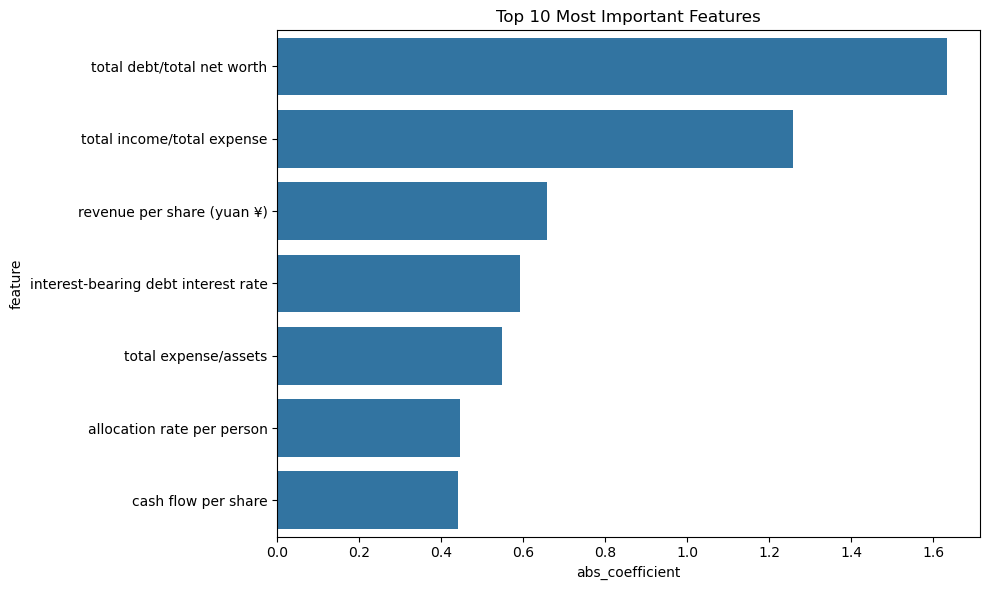

In [236]:
# Feature importance plot
plt.figure(figsize=(10, 6))
sns.barplot(data=coefficient_analysis.head(10), x='abs_coefficient', y='feature')
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.show()